# ML4NLP1
## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is o make you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing files to Google Colab:** If you have never used Colab or never uploaded a file to Colab, quickly skim over an introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

We're using the second method mentioned in the blogpost: (1) upload the four files `x_train.txt` and `y_train.txt`, `x_test.txt` and `y_test.txt` to a directory in Google Drive and (2) adjust the paths in the second cell to point to your uploaded files.

Then execute the first cell to give Colab permission to access the two files.

In [2]:
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict

In [3]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 216MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 131MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 88.0MB/s]


In [4]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [5]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

In [6]:
train_df.head(10)

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha
5,"Mudde 14, 2012tti, TNQ USA raxibacumab antiraa...",orm
6,"Kiribati is 't 174e land op de wereld, nao Saõ...",lim
7,He was a economics graduate from Elphinstone C...,guj
8,براعظم ایشیاء تے یورپ اتے پھیلے ہوئے دیس ترکی ...,pnb
9,Vanwehe zen Gentsen ofkomst wor 't een ok wè G...,zea


In [7]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [8]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages. Do you notice anything that might be challenging for the classification?

In some instances, the data contains multiple languages; for example, in index 4, there are English words within the Thai sentence. (อักษรโรมัน: Thanon Charoen Krung)

In [9]:
# T: How many instances per label are there in the training and test set? Do you think this is a balanced dataset? Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.

There are 500 instances per label in the training and test dataset.
The proportion between the training and test set is equal, which is not appropriate. The training data should count for 80% whilst the test data has a proportion of 20%.

In [10]:
#count the number of instances per label in the training set and test set
label_counts_train = train_df['label'].value_counts()
label_counts_test = test_df['label'].value_counts()

In [11]:
print(f"training data label counts: {label_counts_train}\n\ntest data label counts: {label_counts_test}")

training data label counts: est    500
eng    500
vep    500
sgs    500
uig    500
      ... 
lmo    500
mya    500
ilo    500
csb    500
ltz    500
Name: label, Length: 235, dtype: int64

test data label counts: mwl    500
uig    500
tat    500
nno    500
new    500
      ... 
frp    500
krc    500
mlg    500
msa    500
ckb    500
Name: label, Length: 235, dtype: int64


In [12]:
# combine x_train, x_test and y_train, y_test into one dataframe
data_df = pd.DataFrame({'text': x_train + x_test, 'label': y_train + y_test})
# write train_df to csv with tab as separator
data_df.to_csv('data.csv', index=False, sep='\t')

In [13]:
# Rearrange the data into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

test_size = 0.2
data = pd.read_csv('data.csv', delimiter='\t')
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [14]:
#It turns out the train data contains 188,000 rows and test data contains 47,000 rows, which is a suitable proportion.
print(f"train data counts:{X_train.count()},\ntest data counts:{X_test.count()}")

train data counts:text    188000
dtype: int64,
test data counts:text    47000
dtype: int64


In [15]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish Norwegian and Japanese, plus 20 additional languages of your choice (the labels can be found in the file labels.csv)

In [16]:
# Store the desired categories into a list
desired_categories = ['eng', 'deu', 'nld', 'dan', 'nno', 'swe', 'jpn',
                      'lzh', 'kor', 'ell', 'fra', 'isl','ita', 'pol', 'spa', 'rus', 'ara',
                      'ang', 'fas', 'lat', 'por', 'hye','tur', 'chr', 'ind',  'zea', 'hat' ]

# Create a subset that includes only the desired categories
subset_data = data_df[data_df['label'].isin(desired_categories)]

# Split the subset into training set and test set
X_sub = subset_data.drop('label', axis = 1)
y_sub = subset_data['label']
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)

train_sub_df = pd.DataFrame({'text': X_train_sub['text'], 'label': y_train_sub})
test_sub_df = pd.DataFrame({'text': X_test_sub['text'], 'label': y_test_sub})

In [17]:
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder to the training data
le_fitted = LabelEncoder()
le_fitted.fit(train_sub_df['label'])

# Encode the labels for the training and test data
y_train_dev = le_fitted.transform(train_sub_df['label'])
y_test = le_fitted.transform(test_sub_df['label'])

train_sub_df['label_encoded'] = y_train_dev
test_sub_df['label_encoded'] = y_test

In [18]:
train_sub_df.head()

,text,label,label_encoded
128091,1943 yılı ile beraber Yugoslavya Krallığı orta...,tur,25
181983,"Nel 1976 è il singolo Cavallo Bianco, ispirato...",ita,13
11484,"Fu Natalie Portman, nel 2005, a regalare una c...",ita,13
69712,"Il 30 ottobre 2007, durante una visita di Stat...",ita,13
173183,(en) Cet article est partiellement ou en total...,fra,8


## 2.Create a suitable pipeline in sklearn to preprocess the data.
Think about extending the feature space. What other features could you use to determine the language? Please include additional linguistic features to your machine learning model for this task.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
import re

In [20]:
# Define a function to clean the text data
def data_clean(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower()

  return text

In [21]:
# Vectorize the data
data_Vec = FeatureUnion([
    ('tfidf_word', TfidfVectorizer(
        preprocessor=data_clean,
        max_features=1000,
    )),
    ('tfidf_char', TfidfVectorizer(
        preprocessor=data_clean,
        analyzer='char',
        ngram_range=(3,3),
        max_features=1000
    ))
])

In [22]:
# Define the logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [23]:
# Create the pipeline
pipeline = Pipeline([
    ('data_Vec', data_Vec),
    ('linear_model', lr)
])

## 3.Train the following classifier: LogisticRegression

In [24]:
pipeline.fit(train_sub_df['text'], train_sub_df['label_encoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('data_Vec',
                 FeatureUnion(transformer_list=[('tfidf_word',
                                                 TfidfVectorizer(max_features=1000,
                                                                 preprocessor=<function data_clean at 0x78a602950af0>)),
                                                ('tfidf_char',
                                                 TfidfVectorizer(analyzer='char',
                                                                 max_features=1000,
                                                                 ngram_range=(3,
                                                                              3),
                                                                 preprocessor=<function data_clean at 0x78a602950af0>))])),
                ('linear_model',
                 LogisticRegression(multi_class='multinomial'))])

In [25]:
# Define a function "model_score" to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def model_score(y_true, y_pred):
    # Generate a classification report
    class_report = classification_report(y_true, y_pred)
    print('Classification Report:\n', class_report)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix
    sns.set(font_scale=0.6)
    plt.figure(figsize=(8, 6))

    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       784
           1       0.82      0.10      0.18       813
           2       0.85      0.88      0.86       814
           3       1.00      0.98      0.99       771
           4       0.94      0.98      0.96       773
           5       0.76      0.29      0.42       787
           6       0.87      0.99      0.93       810
           7       0.81      0.09      0.16       818
           8       0.96      0.99      0.98       797
           9       1.00      1.00      1.00       803
          10       0.76      0.17      0.28       806
          11       1.00      0.98      0.99       806
          12       1.00      1.00      1.00       783
          13       0.99      0.99      0.99       808
          14       0.80      0.27      0.41       812
          15       0.73      0.18      0.29       795
          16       0.97      0.97      0.97       806
   

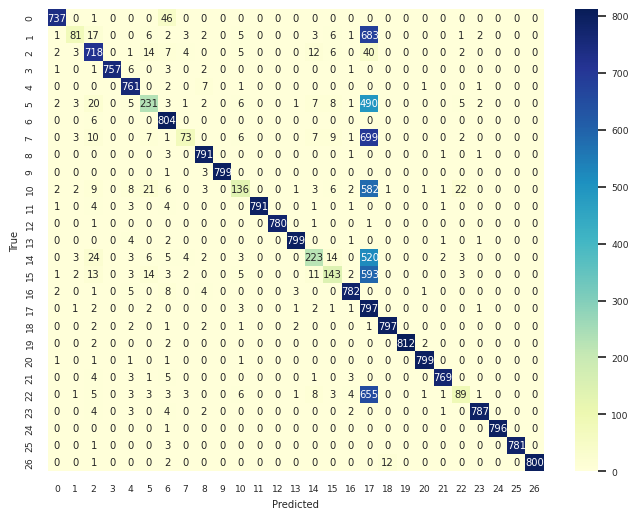

In [26]:
y_true = train_sub_df['label_encoded']
y_pred = pipeline.predict(train_sub_df['text'])

model_score(y_true, y_pred)


##4.To find the optimal hyperparameter settings for the classifier, use sklearn’s GridSearchCV.
[hint: don’t overdo it at the beginning, since runtime might go up fast] You are supposed to experiment with the following hyperparameters1:

a. Penalty (Regularization)
b. Solver
c. Experiment with parameters of the Vectorizer (not required, highly advised)

In [27]:
# Find the optimal hyperparameter using GridSearchCV
from sklearn.model_selection import GridSearchCV

set_param_grid = {
    'linear_model__penalty': ['l1', 'l2'],
    'linear_model__C': [1, 10],
    'linear_model__solver': ['lbfgs', 'newton-cg'],
    'data_Vec__tfidf_word__max_features': [5000],
    'data_Vec__tfidf_word__ngram_range': [(1,2), (3, 3)],
    'data_Vec__tfidf_char__max_features': [5000],
    'data_Vec__tfidf_char__ngram_range': [(1,2), (3, 3)]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=set_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1)

In [28]:
# fit the train data in the grid search
grid_search.fit(train_sub_df['text'], train_sub_df['label_encoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('data_Vec',
                                        FeatureUnion(transformer_list=[('tfidf_word',
                                                                        TfidfVectorizer(max_features=1000,
                                                                                        preprocessor=<function data_clean at 0x78a602950af0>)),
                                                                       ('tfidf_char',
                                                                        TfidfVectorizer(analyzer='char',
                                                                                        max_features=1000,
                                                                                        ngram_range=(3,
                                                                                                     3),
                                                                                        preprocessor=<function data_clean at 0x78a602950af0>))])),
                                       ('linear_model',
                                        LogisticRe...tinomial'))]),
             n_jobs=-1,
             param_grid={'data_Vec__tfidf_char__max_features': [5000],
                         'data_Vec__tfidf_char__ngram_range': [(1, 2), (3, 3)],
                         'data_Vec__tfidf_word__max_features': [5000],
                         'data_Vec__tfidf_word__ngram_range': [(1, 2), (3, 3)],
                         'linear_model__C': [1, 10],
                         'linear_model__penalty': ['l1', 'l2'],
                         'linear_model__solver': ['lbfgs', 'newton-cg']},
             scoring='accuracy')

In [29]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [30]:
print(best_model)
print(best_params)

Pipeline(steps=[('data_Vec',
                 FeatureUnion(transformer_list=[('tfidf_word',
                                                 TfidfVectorizer(max_features=5000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 preprocessor=<function data_clean at 0x78a602950af0>)),
                                                ('tfidf_char',
                                                 TfidfVectorizer(analyzer='char',
                                                                 max_features=5000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 preprocessor=<function data_clean at 0x78a602950af0>))])),
                ('linear

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       0.94      0.15      0.26       813
           2       0.94      0.94      0.94       814
           3       1.00      1.00      1.00       771
           4       0.99      1.00      1.00       773
           5       0.91      0.37      0.53       787
           6       0.99      1.00      0.99       810
           7       0.21      0.97      0.34       818
           8       1.00      1.00      1.00       797
           9       1.00      1.00      1.00       803
          10       0.91      0.25      0.39       806
          11       1.00      1.00      1.00       806
          12       1.00      1.00      1.00       783
          13       1.00      1.00      1.00       808
          14       0.94      0.52      0.67       812
          15       0.88      0.26      0.40       795
          16       1.00      1.00      1.00       806
   

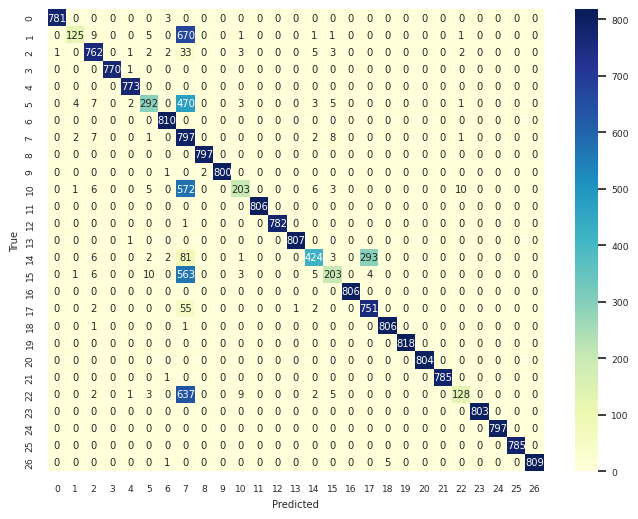

In [31]:
# Evaluate the best model on training subset data
y_true = train_sub_df['label_encoded']
y_pred = best_model.predict(train_sub_df['text'])

model_score(y_true, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       216
           1       0.25      0.03      0.05       187
           2       0.73      0.80      0.76       186
           3       1.00      0.97      0.98       229
           4       0.97      1.00      0.98       227
           5       0.48      0.20      0.28       213
           6       0.87      0.98      0.92       190
           7       0.16      0.82      0.26       182
           8       0.97      1.00      0.98       203
           9       0.99      0.98      0.99       197
          10       0.42      0.09      0.15       194
          11       1.00      0.98      0.99       194
          12       1.00      1.00      1.00       217
          13       0.97      0.97      0.97       192
          14       0.55      0.34      0.42       188
          15       0.49      0.12      0.20       205
          16       0.94      0.94      0.94       194
   

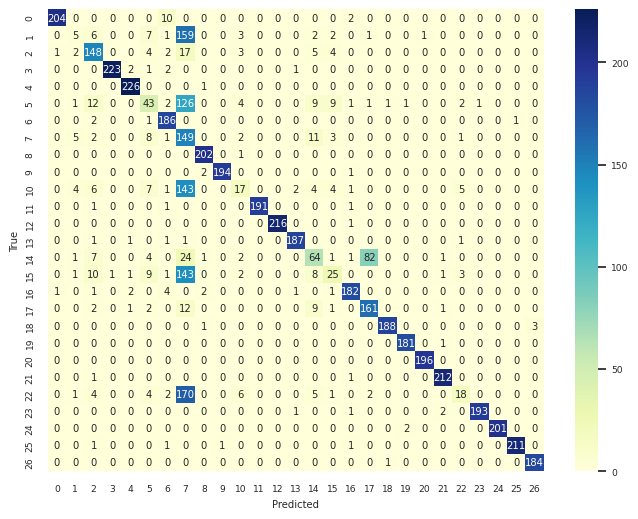

In [32]:
# Evaluate the best model on test data
y_true = test_sub_df['label_encoded']
y_pred = best_model.predict(test_sub_df['text'])

model_score(y_true, y_pred)

In [33]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=dd1aa019b6007edbfc5913f168bd4fa67e4b3bccb986e8e1388a2f98883fbc5c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [55]:
import eli5

# Define target names based on your classification task
target_names = desired_categories

# To explain the 'tfidf_word' feature importance
vec_word = best_model.named_steps['data_Vec'].transformer_list[0][1]
feature_names_word = tfidf_word_vectorizer.get_feature_names_out()

eli5.show_weights(
    best_model.named_steps['linear_model'],
    vec=vec_word,
    top=10,
    target_names=target_names,
    targets=['eng', 'swe', 'nno', 'jpn']
)

# To explain the 'tfidf_char' feature importance
vec_char = best_model.named_steps['data_Vec'].transformer_list[1][1]
feature_names_char = tfidf_char_vectorizer.get_feature_names_out()

eli5.show_weights(
    best_model.named_steps['linear_model'],
    vec=vec_char,
    top=10,
    target_names=target_names,
    targets=['eng', 'swe', 'nno', 'jpn']
)


Lastly, you will condact a small ablation study.
First, choose the two languages for which the classifier worked best.
Next, re-fit the best working model several times, each time reducing the number of characters per instance in the
training set (1. All characters, 2. 500 characters, 3. 100 characters).
How does the ablation affect the
performance of the classifier?

In [ ]:
# Choose two languages the classifier worked best, they are 20(Polish) and 24(Swedish), whose F1_socre=1

In [70]:
label_mapping = train_sub_df[['label', 'label_encoded']].drop_duplicates()

print(label_mapping)

       label  label_encoded
128091   tur             25
181983   ita             13
173183   fra              8
60200    deu              4
130655   ell              5
30077    ara              1
97733    nno             19
13631    lzh             17
125180   fas              7
129368   ang              0
27338    hat              9
66737    jpn             14
177997   chr              2
17789    spa             23
115757   dan              3
231195   por             21
67542    ind             11
37014    nld             18
143862   lat             16
69365    hye             10
3192     rus             22
59120    isl             12
89084    kor             15
123481   pol             20
157481   swe             24
153887   eng              6
39989    zea             26


In [71]:
import pandas as pd

best_langs = ['pol', 'swe']

# Create a subset that includes only the desired categories
best_langs_data = data_df[data_df['label'].isin(best_langs)]

# Split the subset into training set and test set
X = best_langs_data.drop('label', axis = 1)
y = best_langs_data['label']

X_train_lang, X_test_lang, y_train_lang, y_test_lang = train_test_split(X, y, test_size=0.2, random_state=42)

train_lang_df = pd.DataFrame({'text': X_train_lang['text'], 'label': y_train_lang})
test_lang_df = pd.DataFrame({'text': X_test_lang['text'], 'label': y_test_lang})

# Fit the label encoder to the training data
le_fitted = LabelEncoder()
le_fitted.fit(train_lang_df['label'])

# Encode the labels for the training and test data
y_train_dev = le_fitted.transform(train_lang_df['label'])
y_test = le_fitted.transform(test_lang_df['label'])

train_lang_df['label_encoded'] = y_train_dev
test_lang_df['label_encoded'] = y_test

In [72]:
train_lang_df.head()

,text,label,label_encoded
113688,Zdaniem Świadków Jehowy głównym tematem Biblii...,pol,0
28760,Powyższy kod z uwagi na włączoną optymalizację...,pol,0
95651,Mairwa är en ort i Indien. Den ligger i distri...,swe,1
81290,"Jest potwierdzeniem, że Bóg „Jest” (Filon z Al...",pol,0
51511,27 – Kazimierz – Sosnowiec – Pogoń Akademiki (...,pol,0


In [73]:
# Using the best_model's parameter to vectorize the data
data_Vec = FeatureUnion([
    ('tfidf_word', TfidfVectorizer(
        preprocessor=data_clean,
        max_features=5000,
        ngram_range=(1,2)
    )),
    ('tfidf_char', TfidfVectorizer(
        preprocessor=data_clean,
        analyzer='char',
        max_features=5000,
        ngram_range=(1,2)
    ))
])

# Define the logistic regression model
lr = LogisticRegression(C=10, multi_class='multinomial', solver='newton-cg')

# Create the pipeline
best_pipeline = Pipeline([
    ('data_Vec', data_Vec),
    ('linear_model', lr)
])

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       205

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



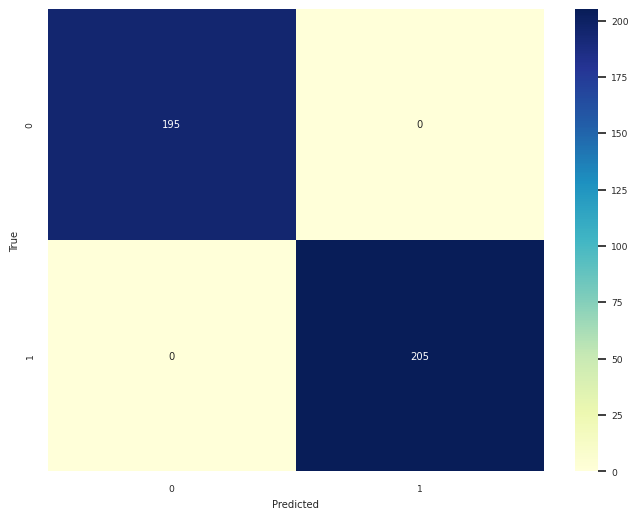

In [74]:
# 1. Fit the training set of the two languages with all characters into the best pipline
best_pipeline.fit(train_lang_df['text'], train_lang_df['label_encoded'])

#show the performance of the model
y_true = test_lang_df['label_encoded']
y_pred = best_pipeline.predict(test_lang_df['text'])

model_score(y_true, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       205

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



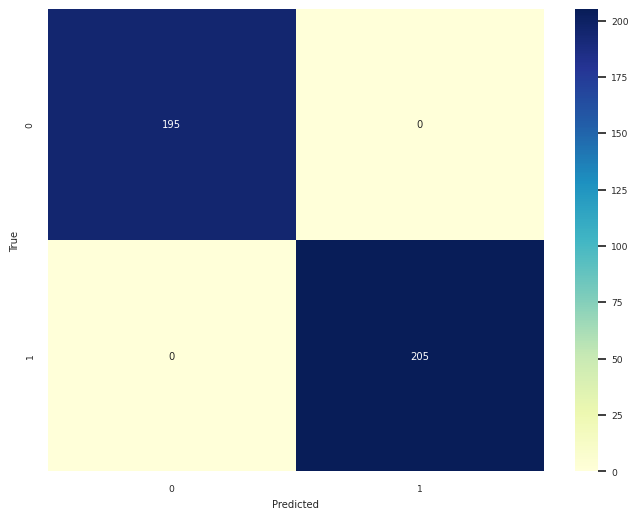

In [75]:
from IPython.testing import test
#2. Fit the training set of the two languages with 500 characters into the best pipline
train_lang_df['text'] = train_lang_df['text'].str[:500]
best_pipeline.fit(train_lang_df['text'], train_lang_df['label_encoded'])

#show the performance of the model
y_true = test_lang_df['label_encoded']
y_pred = best_pipeline.predict(test_lang_df['text'])
model_score(y_true, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       205

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



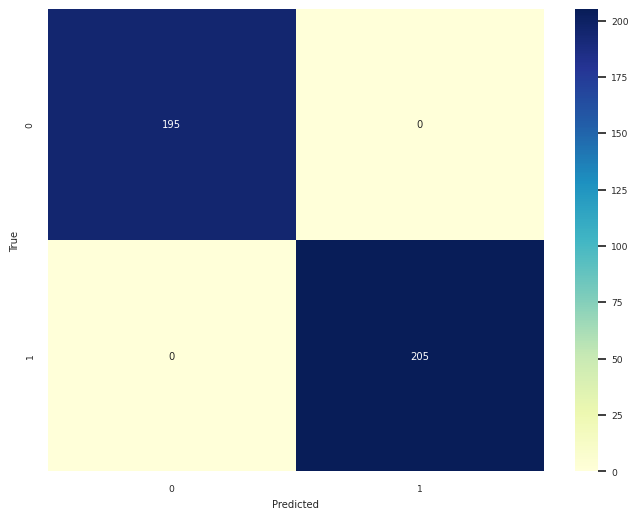

In [76]:
#3. Fit the training set of the two languages with 100 characters into the best pipline
train_lang_df['text'] = train_lang_df['text'].str[:100]
best_pipeline.fit(train_lang_df['text'], train_lang_df['label_encoded'])

#show the performance of the model
y_true = test_lang_df['label_encoded']
y_pred = best_pipeline.predict(test_lang_df['text'])
model_score(y_true, y_pred)